In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import model_selection, preprocessing, metrics
import datetime

In [65]:
train_df = pd.read_csv("input/train.csv", parse_dates=["first_active_month"])
test_df = pd.read_csv("input/test.csv", parse_dates=["first_active_month"])
hist_trans = pd.read_csv("input/historical_transactions.csv", parse_dates=['purchase_date'])

In [4]:
merch = pd.read_csv("input/merchants.csv")
merch_trans = pd.read_csv("input/new_merchant_transactions.csv")

In [10]:
print(train_df.shape, test_df.shape, hist_trans.shape, merch.shape, merch_trans.shape)

(201917, 6) (123623, 5) (29112361, 14) (334696, 22) (1963031, 14)


In [19]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [29]:
train_df.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [14]:
train_df.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

In [15]:
hist_trans.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [18]:
print('merchant / merchant transactions')
print(merch.columns)
print('')
print(merch_trans.columns)

merchant / merchant transactions
Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')


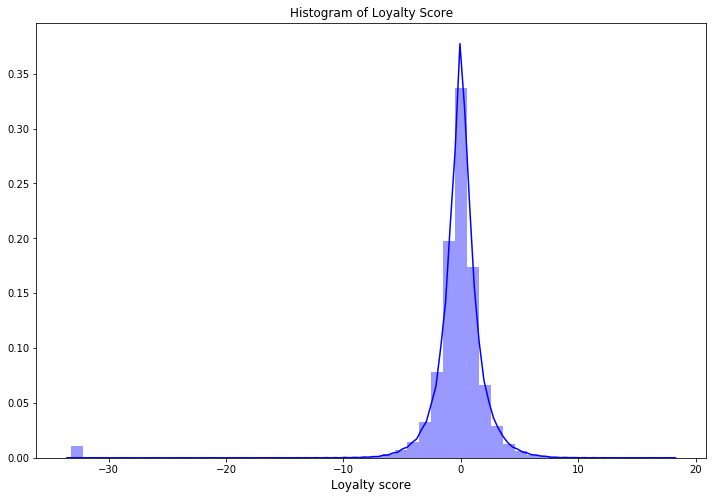

In [28]:
plt.figure(figsize=(12,8))
sns.distplot(train_df['target'].values, bins=50, color="blue")
plt.title("Histogram of Loyalty Score")
plt.xlabel('Loyalty score', fontsize=12)
plt.savefig("plots/distplot.png")
plt.show()

In [7]:
train_df.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

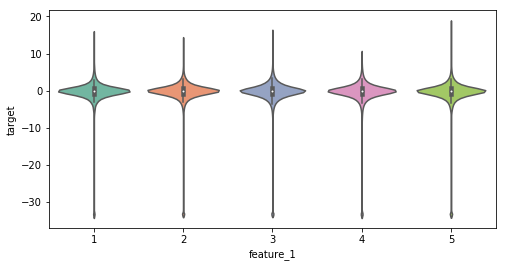

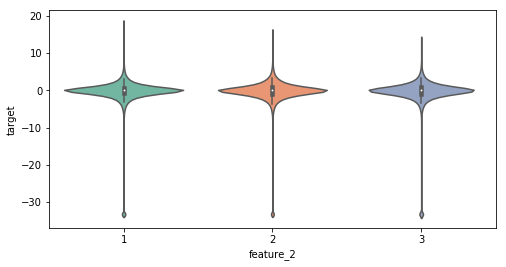

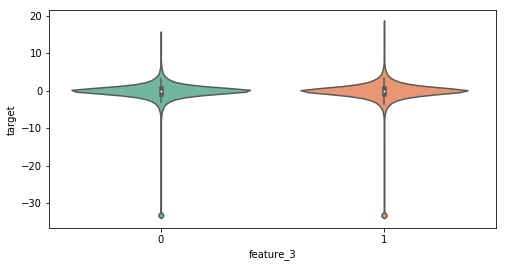

In [16]:
plt.figure(figsize=(8,4))
ax = sns.violinplot(x="feature_1",
                    y="target",
                    data=train_df, 
                    palette="Set2")
plt.savefig("plots/vplot_f1.png")
plt.show()

plt.figure(figsize=(8,4))
ax = sns.violinplot(x="feature_2",
                    y="target",
                    data=train_df, 
                    palette="Set2")
plt.savefig("plots/vplot_f2.png")
plt.show()

plt.figure(figsize=(8,4))
ax = sns.violinplot(x="feature_3",
                    y="target",
                    data=train_df, 
                    palette="Set2")
plt.savefig("plots/vplot_f3.png")
plt.show()

# Historical Transactions

Our Historical Transactions have the following attributes

- card_id : Card identifier
- month_lag : month lag to reference date
- purchase_date	: Purchase date
- authorized_flag : Y' if approved, 'N' if denied
- category_3 :anonymized category
- installments : number of installments of purchase
- category_1 : anonymized category
- merchant_category_id	: Merchant category identifier (anonymized )
- subsector_id	: Merchant category group identifier (anonymized )
- merchant_id : Merchant identifier (anonymized)
- purchase_amount : Normalized purchase amount
- city_id : City identifier (anonymized )
- state_id : State identifier (anonymized )
- category_2 : anonymized category

links:

follow ups:

- Get dummies for nunique columns.
- parse_dates=['purchase_date']



In [67]:
hist_trans['purchase_month'] = hist_trans['purchase_date'].dt.month

In [69]:
def binarize(df):
    for col in ['authorized_flag', 'category_1']:
        df[col] = df[col].map({'Y':1, 'N':0})
    return df

In [70]:
def aggregate_transactions(history):
    
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
    
    agg_func = {
    'category_1': ['sum', 'mean'],
    'category_2_1.0': ['mean'],
    'category_2_2.0': ['mean'],
    'category_2_3.0': ['mean'],
    'category_2_4.0': ['mean'],
    'category_2_5.0': ['mean'],
    'category_3_A': ['mean'],
    'category_3_B': ['mean'],
    'category_3_C': ['mean'],
    'merchant_id': ['nunique'],
    'merchant_category_id': ['nunique'],
    'state_id': ['nunique'], 
    'city_id': ['nunique'],
    'subsector_id': ['nunique'],
    'purchase_amount': ['sum', 'mean', 'median',  'max', 'min', 'std'],
    'installments': ['sum', 'mean', 'median', 'max', 'min', 'std'],
    'purchase_month': ['mean', 'max', 'min', 'std'],
    'purchase_date': [np.ptp, 'min', 'max'],
    }
    
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['_'.join(col).strip() for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history

In [73]:
#hist_trans = binarize(hist_trans)
#hist_trans = pd.get_dummies(hist_trans, columns=['category_2', 'category_3'])
hist_trans = aggregate_transactions(hist_trans)
#train_df = pd.merge(train_df, hist_trans, on="card_id", how="left")

In [ ]:
hist_trans.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'merchant_category_id', 'merchant_id', 'month_lag', 'purchase_amount',
       'purchase_date', 'state_id', 'subsector_id', 'purchase_month',
       'category_2_1.0', 'category_2_2.0', 'category_2_3.0', 'category_2_4.0',
       'category_2_5.0', 'category_3_A', 'category_3_B', 'category_3_C'],
      dtype='object')

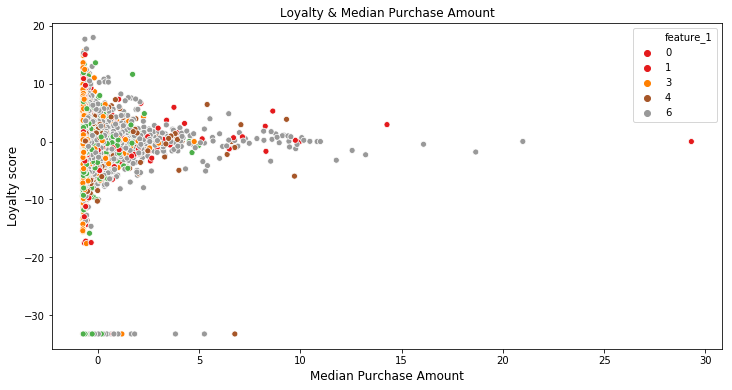

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="median_trans_x", 
                y="target", 
                hue='feature_1', 
                palette="Set1",
                data=train_df)
plt.title("Loyalty & Median Purchase Amount")
plt.xlabel('Median Purchase Amount', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.savefig("plots/PurchaseAmount1.png")
plt.show()